In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
absenteeism_at_work = fetch_ucirepo(id=445)

# data (as pandas dataframes)
X = absenteeism_at_work.data.features
y = absenteeism_at_work.data.targets

# metadata
print(absenteeism_at_work.metadata)

# variable information
print(absenteeism_at_work.variables)


{'uci_id': 445, 'name': 'Absenteeism at work', 'repository_url': 'https://archive.ics.uci.edu/dataset/445/absenteeism+at+work', 'data_url': 'https://archive.ics.uci.edu/static/public/445/data.csv', 'abstract': 'The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 740, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Education Level'], 'target_col': ['Absenteeism time in hours'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5X882', 'creators': ['Andrea Martiniano', 'Ricardo Ferreira'], 'intro_paper': {'ID': 414, 'type': 'NATIVE', 'title': 'Application of a neuro fuzzy network in prediction of absenteeism at work', 'authors': 'A

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Features (X) head:")
display(X.head())

print("\nTargets (y) head:")
display(y.head())

Features (X) head:


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30



Targets (y) head:


,Absenteeism time in hours
0,4
1,0
2,2
3,4
4,2


### Distribution of 'Absenteeism time in hours'

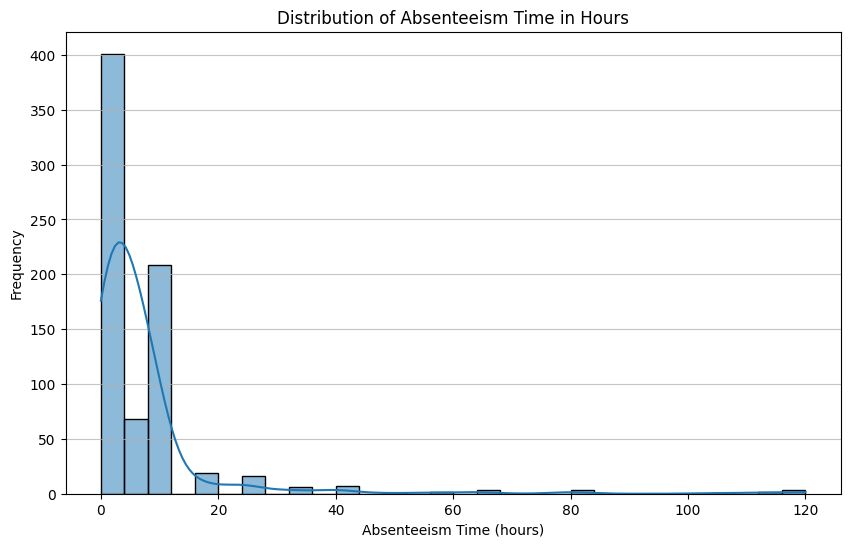

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(y['Absenteeism time in hours'], bins=30, kde=True)
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Absenteeism Time (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Top Reasons for Absence

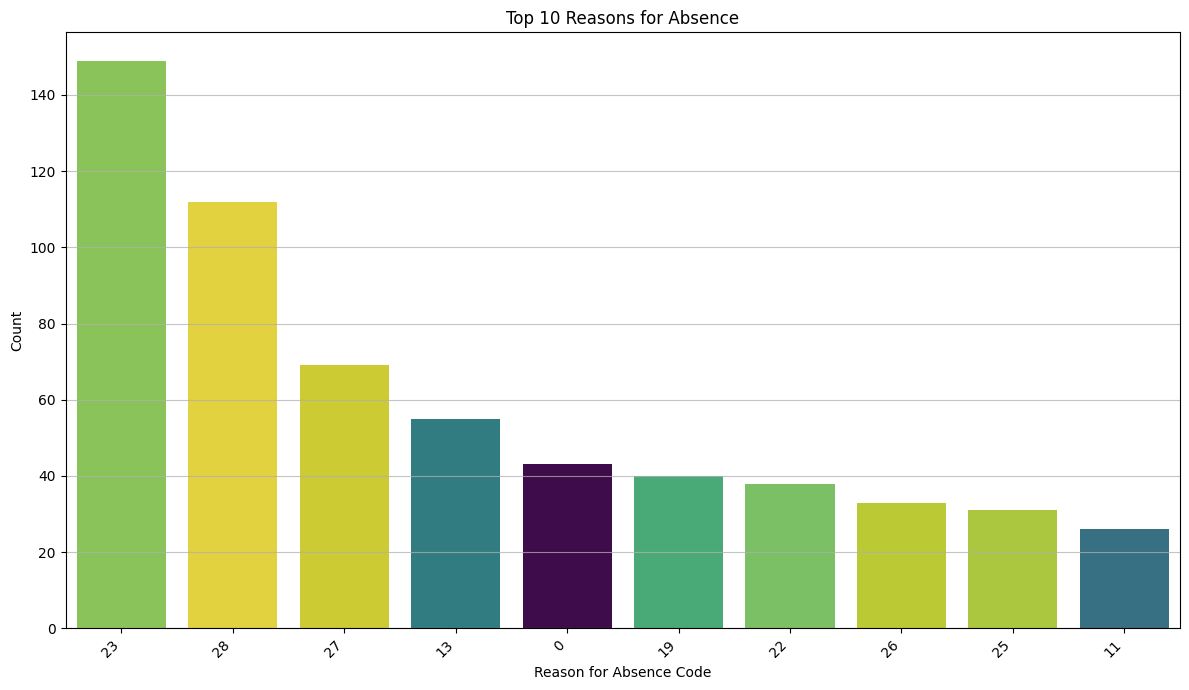

In [7]:
# Get the top 10 reasons for absence
top_reasons = X['Reason for absence'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 7))
sns.countplot(data=X[X['Reason for absence'].isin(top_reasons)], x='Reason for absence', order=top_reasons, hue='Reason for absence', palette='viridis', legend=False)
plt.title('Top 10 Reasons for Absence')
plt.xlabel('Reason for Absence Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### Education Level Distribution

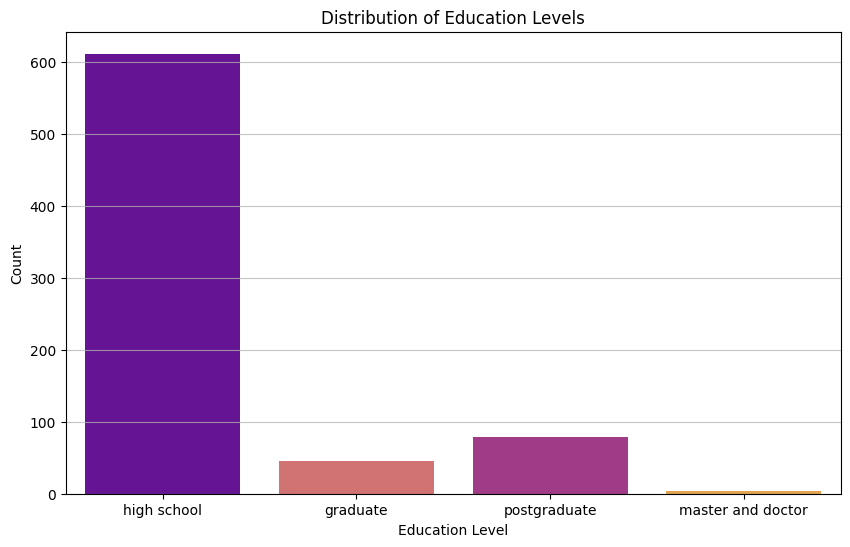

In [8]:
education_mapping = {
    1: 'high school',
    2: 'graduate',
    3: 'postgraduate',
    4: 'master and doctor'
}

X.loc[:, 'Education_Label'] = X['Education'].map(education_mapping)

plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='Education_Label', order=education_mapping.values(), hue='Education_Label', palette='plasma', legend=False)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Drop the temporary column
X = X.drop(columns=['Education_Label'])

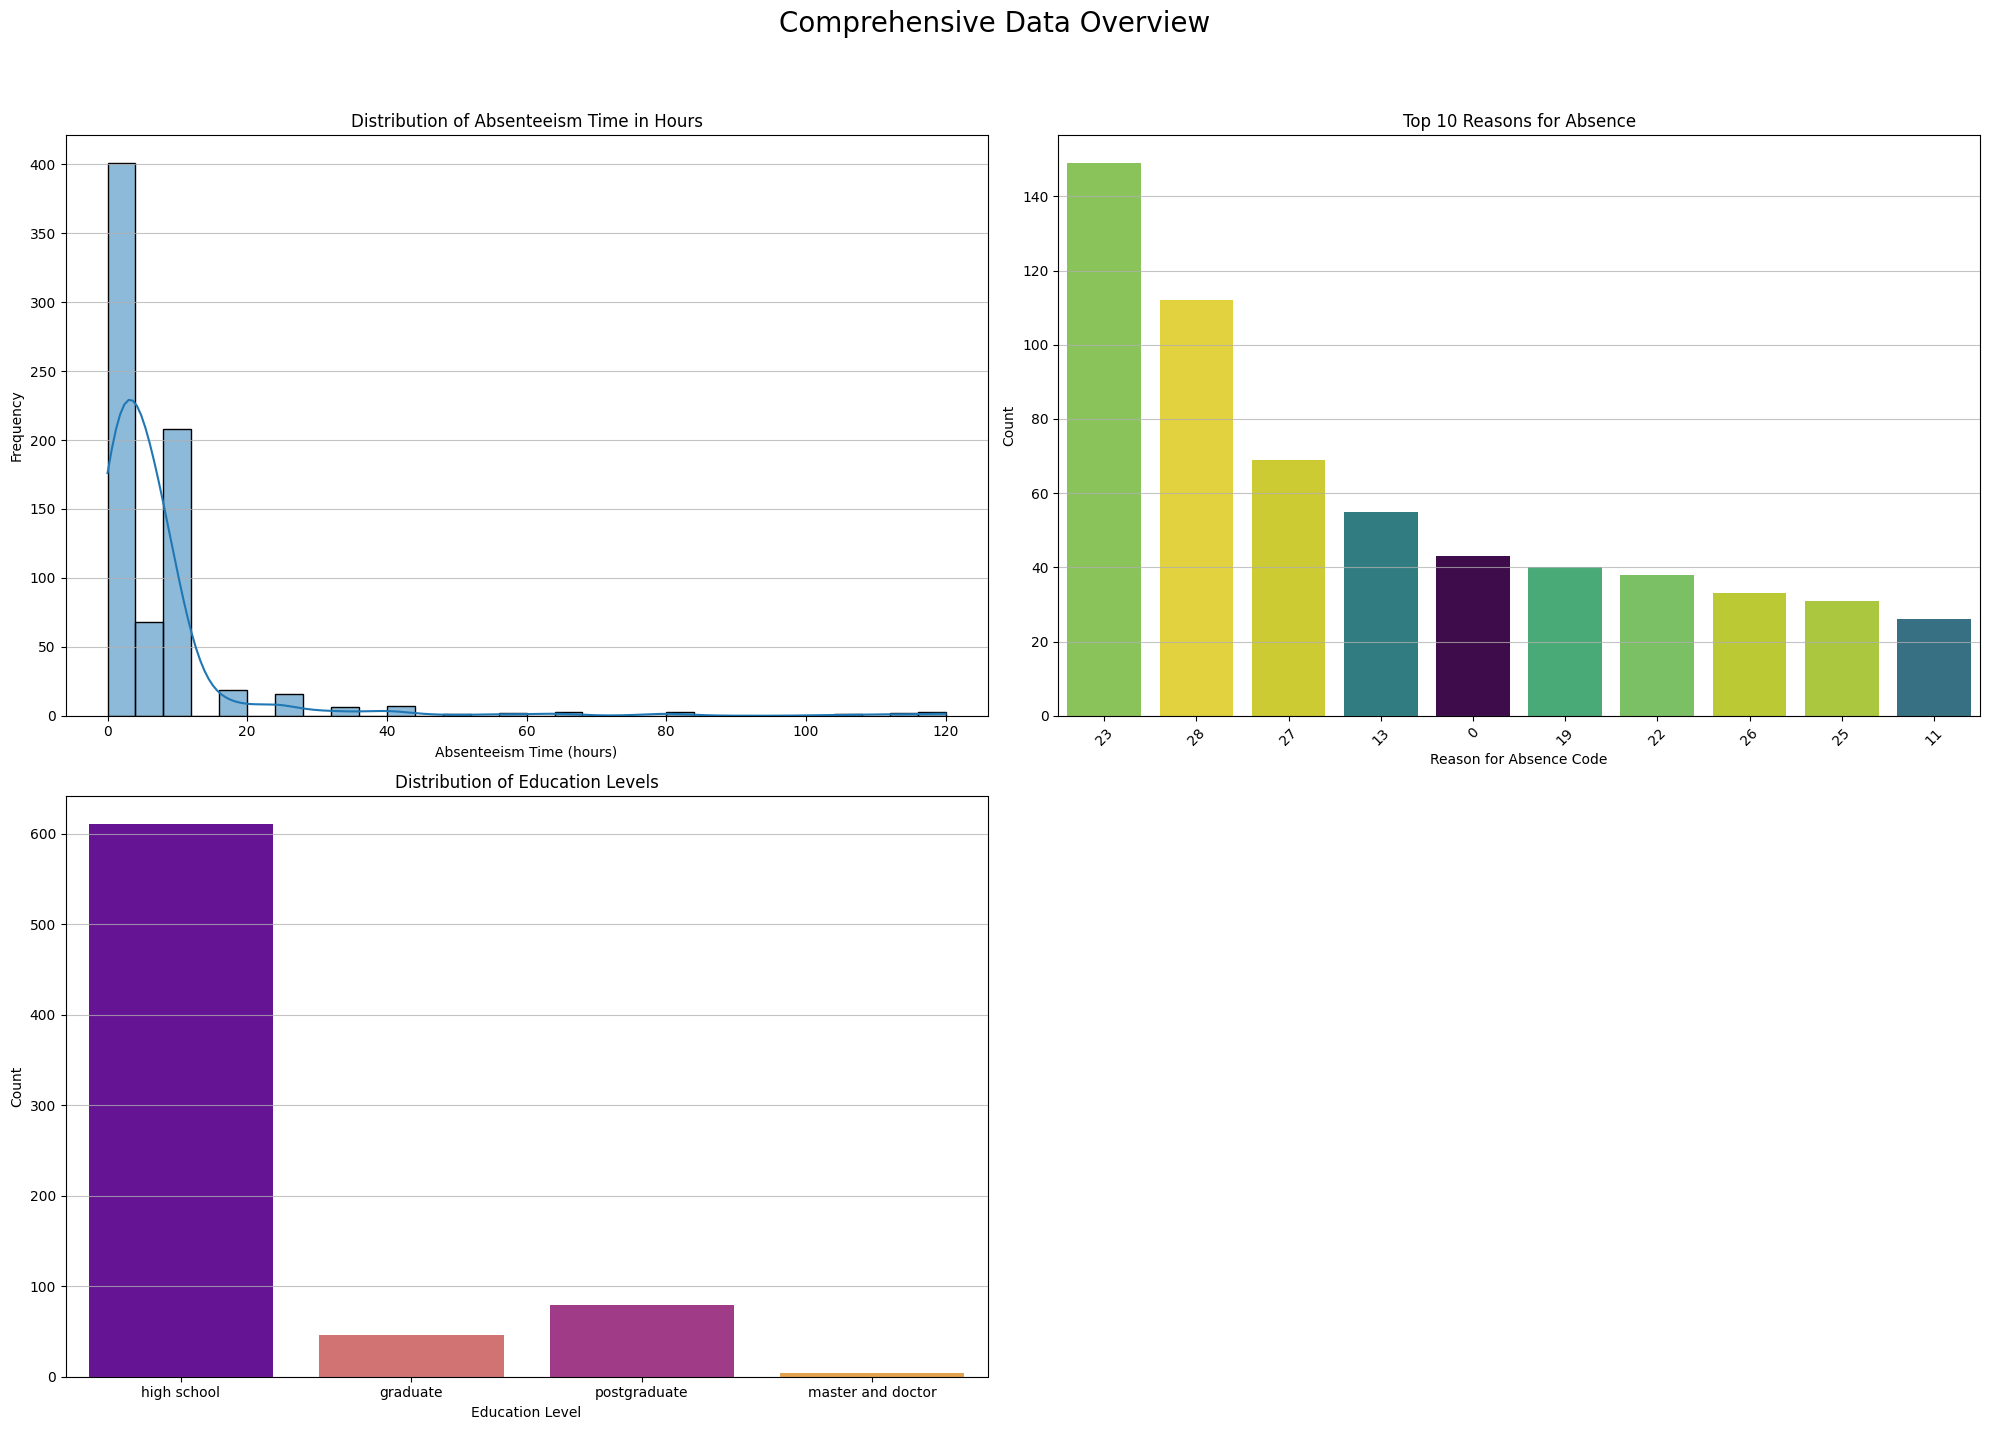

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.suptitle('Comprehensive Data Overview', fontsize=20)

# Plot 1: Distribution of Absenteeism Time in Hours
sns.histplot(y['Absenteeism time in hours'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Absenteeism Time in Hours')
axes[0, 0].set_xlabel('Absenteeism Time (hours)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.75)

# Plot 2: Top 10 Reasons for Absence
top_reasons = X['Reason for absence'].value_counts().nlargest(10).index
sns.countplot(data=X[X['Reason for absence'].isin(top_reasons)], x='Reason for absence', order=top_reasons, hue='Reason for absence', palette='viridis', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Reasons for Absence')
axes[0, 1].set_xlabel('Reason for Absence Code')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.75)

# Plot 3: Education Level Distribution
education_mapping = {
    1: 'high school',
    2: 'graduate',
    3: 'postgraduate',
    4: 'master and doctor'
}
# Temporarily create 'Education_Label' for plotting
X_temp = X.copy()
X_temp.loc[:, 'Education_Label'] = X_temp['Education'].map(education_mapping)
sns.countplot(data=X_temp, x='Education_Label', order=education_mapping.values(), hue='Education_Label', palette='plasma', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Education Levels')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.75)

# Hide the fourth subplot as it's not needed
axes[1, 1].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()